# Simple Neighborhood Profiling 

**In this notebook, I simply look into Toronto Neighborhood profiles and extracts details such as age,income,marital status and education**

**I then cluster each variable (age, income, marital status, and education) using K-means cluster to see if there are certain areas of dominance**

**For instance, using the clusters, we will be able to tell if certain neighborhoods of Toronto consists of people with higher income**

In [ ]:
pip install shapely
conda install geopandas
pip install geojsonio

In [1]:
import geojsonio
import geopandas as gpd
import pandas as pd


In [2]:
df=pd.read_csv('neighbourhood-profiles-2016.csv')

df

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,2379,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Migrants,"400,950","3,170","3,145",925,"6,390",...,"3,765","2,270","7,260",985,620,"1,350","2,425","2,310","4,965","1,345"
2379,2380,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Internal migrants,"184,120",880,980,680,"3,930",...,"1,545","1,110","1,720",610,395,780,"1,260","1,355","1,700",580
2380,2381,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Intraprovincial migrants,"141,135",735,760,615,"2,630",...,"1,070",960,"1,400",350,320,570,970,"1,025","1,490",445
2381,2382,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Interprovincial migrants,"42,985",135,220,70,"1,310",...,475,150,335,250,85,210,290,325,195,135


#### **As you can see in the above dataframe, there are a few columns we will not need for this analysis - Data Source & Characteristics.**

**Moreover, we should also get rid of the row that contains "Neighborhood Information" and " TSNS2020 Designation" in its Category just because its not significant for this analysis**

In [3]:
del df['Data Source']



In [4]:
indexNames = df[ df['Characteristic'] == 'Neighbourhood Number' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

indexNames = df[ df['Characteristic'] == 'TSNS2020 Designation' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

df.drop([col for col in df.columns if 'City of Toronto' in col],axis=1,inplace=True)



In [5]:
del df['_id']


In [6]:
del df['Category']

df

,Topic,Characteristic,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
2,Population and dwellings,"Population, 2016","29,113","23,757","12,054","30,526","27,695","15,873","25,797","21,396",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,Population and dwellings,"Population, 2011","30,279","21,988","11,904","29,177","26,918","15,434","19,348","17,671",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,Population and dwellings,Population Change 2011-2016,-3.90%,8.00%,1.30%,4.60%,2.90%,2.80%,33.30%,21.10%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%
5,Population and dwellings,Total private dwellings,"9,371","8,535","4,732","18,109","12,473","6,418","18,436","10,111",...,"8,054","8,721","19,098","5,620","3,604","6,185","6,103","7,475","11,051","5,847"
6,Population and dwellings,Private dwellings occupied by usual residents,"9,120","8,136","4,616","15,934","12,124","6,089","15,074","9,532",...,"7,549","8,509","18,436","5,454","3,449","5,887","5,676","7,012","10,170","5,344"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,Mobility status - Place of residence 5 years ago,Migrants,"3,170","3,145",925,"6,390","3,140","2,235","11,780","5,015",...,"3,765","2,270","7,260",985,620,"1,350","2,425","2,310","4,965","1,345"
2379,Mobility status - Place of residence 5 years ago,Internal migrants,880,980,680,"3,930","1,405",915,"5,250","1,995",...,"1,545","1,110","1,720",610,395,780,"1,260","1,355","1,700",580
2380,Mobility status - Place of residence 5 years ago,Intraprovincial migrants,735,760,615,"2,630","1,190",745,"3,275","1,485",...,"1,070",960,"1,400",350,320,570,970,"1,025","1,490",445
2381,Mobility status - Place of residence 5 years ago,Interprovincial migrants,135,220,70,"1,310",220,170,"1,970",510,...,475,150,335,250,85,210,290,325,195,135


**In an effort to filter the data to only analyze what we need, I have chosen the below Topics to focus on. Because the aim for this analysis is to understand the clusters a bit further than just venues, information such as Education, Age, Martial Status, Income could be good additions**

In [191]:
new_df= df.loc[(df['Topic'] == 'Highest certificate, diploma or degree') 
                | (df['Topic'] == 'Marital status')
                | (df['Topic'] == 'Age characteristics') 
                | (df['Topic'] == 'Income of individuals in 2015')
                | (df['Topic'] == 'Main mode of commuting')]
new_df


,Topic,Characteristic,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,Age characteristics,Children (0-14 years),"3,840","3,075","1,760","2,360","3,605","2,325","1,695","2,415","1,515","4,555","1,120","4,550","3,345","4,600","1,405","1,855","1,435","1,470","3,360",800,"1,490","1,200","2,150","1,260","4,565","2,765","2,575","1,910","1,675","3,020","4,065","4,250","4,480","5,725","1,285","3,735","2,120","4,180","1,805","4,805","2,635","1,695","4,385","2,060","1,365","5,790","2,460","1,295","2,505","2,850","3,540","1,545","2,115","1,450","2,155","2,945","2,165","2,310","5,820","2,190","1,610","2,775","1,315","4,240","1,580","1,695","6,120","2,420","3,280","2,845","3,285","1,400","1,335","7,910","1,500","1,340","3,675","3,505","2,880","1,540","2,395","7,090","2,980","2,380","1,610","1,585","2,810","2,055","1,960","2,290","2,865","3,130","3,110","1,470","1,280","5,840","1,745","1,150","2,050","1,770","1,635","1,640","3,505","2,300","2,625","7,960","2,050","1,940","3,365","2,115","3,975","2,645","3,150","4,060","3,885","2,950","3,825","1,730","5,600","1,745",565,"2,630","3,650","4,635","5,060","3,440","3,100","1,675","4,215","5,920","1,785","3,555","9,625","2,325","1,165","1,860","1,800","1,210","4,045","1,960"
10,Age characteristics,Youth (15-24 years),"3,705","3,360","1,235","3,750","2,730","1,940","6,860","2,505","1,635","3,210",855,"4,605","2,440","3,290",885,"1,655","1,425","1,040","2,460","1,035","1,220","1,080","1,850","5,060","3,495","1,910","2,145","1,545",920,"1,450","3,280","3,155","3,925","4,340","1,065","2,210","1,805","3,130","1,440","3,030","2,40

In [187]:
#print(new_df.dtypes)

list(new_df.columns.values)

['Topic',
 'Characteristic',
 'Agincourt North',
 'Agincourt South-Malvern West',
 'Alderwood',
 'Annex',
 'Banbury-Don Mills',
 'Bathurst Manor',
 'Bay Street Corridor',
 'Bayview Village',
 'Bayview Woods-Steeles',
 'Bedford Park-Nortown',
 'Beechborough-Greenbrook',
 'Bendale',
 'Birchcliffe-Cliffside',
 'Black Creek',
 'Blake-Jones',
 'Briar Hill-Belgravia',
 'Bridle Path-Sunnybrook-York Mills',
 'Broadview North',
 'Brookhaven-Amesbury',
 'Cabbagetown-South St. James Town',
 'Caledonia-Fairbank',
 'Casa Loma',
 'Centennial Scarborough',
 'Church-Yonge Corridor',
 'Clairlea-Birchmount',
 'Clanton Park',
 'Cliffcrest',
 'Corso Italia-Davenport',
 'Danforth',
 'Danforth East York',
 'Don Valley Village',
 'Dorset Park',
 'Dovercourt-Wallace Emerson-Junction',
 'Downsview-Roding-CFB',
 'Dufferin Grove',
 'East End-Danforth',
 'Edenbridge-Humber Valley',
 'Eglinton East',
 'Elms-Old Rexdale',
 'Englemount-Lawrence',
 'Eringate-Centennial-West Deane',
 'Etobicoke West Mall',
 'Flemingdo

**Now that we have extracted the topics we needed for our analysis, we will drop the Topic column as its not significant at this point in time**

**In order to begin working on the neighborhoods, i will have to transpose the columns/rows. However, if i do that without setting Characteristics column as index, then it wouldnt give me the desired output.**

In [192]:
del new_df['Topic']


In [193]:
new_df = new_df.transpose().reset_index().rename(columns={'index':'Variable'})

new_df.columns = new_df.iloc[0]

new_df.head()


,Characteristic,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Male: 0 to 04 years,Male: 05 to 09 years,Male: 10 to 14 years,Male: 15 to 19 years,Male: 20 to 24 years,Male: 25 to 29 years,Male: 30 to 34 years,Male: 35 to 39 years,Male: 40 to 44 years,Male: 45 to 49 years,Male: 50 to 54 years,Male: 55 to 59 years,Male: 60 to 64 years,Male: 65 to 69 years,Male: 70 to 74 years,Male: 75 to 79 years,Female: 10 to 14 years,Male: 80 to 84 years,Male: 85 to 89 years,Male: 90 to 94 years,Male: 95 to 99 years,Male: 100 years and over,Female: 0 to 04 years,Female: 05 to 09 years,Female: 15 to 19 years,Female: 20 to 24 years,Female: 25 to 29 years,Female: 30 to 34 years,Female: 35 to 39 years,Female: 40 to 44 years,Female: 45 to 49 years,Female: 50 to 54 years,Female: 55 to 59 years,Female: 60 to 64 years,Female: 65 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 to 89 years,Female: 90 to 94 years,Female: 95 to 99 years,Female: 100 years and over,Marital status for the population aged 15 years and over,Married or living common law,Married,Living common law,Not married and not living common law,Never married,Separated,Divorced,Widowed,"$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$150,000 and over","$100,000 and over","$100,000 and over","$100,000 to $149,999",Total - Income statistics in 2015 for the population aged 15 years and over in private households,Number of total income recipients aged 15 years and over in private households,Median total income in 2015 among recipients ($),Number of after-tax income recipients aged 15 years and over in private households - 100% data,Median after-tax income in 2015 among recipients ($),Number of market income recipients aged 15 years and over in private households - 100% data,"$30,000 to $39,999",Median market income in 2015 among recipients ($),Number of government transfers recipients aged 15 years and over in private households - 100% data,Median government transfers in 2015 among recipients ($),Number of employment income recipients aged 15 years and over in private households - 100% data,Median employment income in 2015 among recipients ($),Total - Income statistics in 2015 for the population aged 15 years and over in private households - 25% sample data,"$40,000 to $49,999",Number of total income recipients aged 15 years and over in private households - 25% sample data,Average total income in 2015 among recipients ($),Number of after-tax income recipients aged 15 years and over in private households - 25% sample data,Average after-tax income in 2015 among recipients ($),Number of market income recipients aged 15 years and over in private households - 25% sample data,Average market income in 2015 among recipients ($),"$50,000 to $59,999",Number of government transfers recipients aged 15 years and over in private households - 25% sample data,Average government transfers in 2015 among recipients ($),Number of employment income recipients aged 15 years and over in private households - 25% sample data,Average employment income in 2015 among recipients ($),Total - Employment income statistics for the population aged 15 years and over in private households - 25% sample data,Number of employment income recipients aged 15 years and over in private households who worked full year full time in 2015 - 25% sample data,Median employment income in 2015 for full-year full-time workers ($),Average employment income in 2015 for full-year full-time workers ($),Composition of total income in 2015 of the population aged 15 years and over in private households (%) - 100% data,Market income (%),Employment income (%),Government transfers (%),Total - Total income groups in 2015 for the population aged 15 years and over in private households - 100% data,Without total income,With total income,Percentage with total income,"Under $10,000 (includ

In [194]:
new_df = new_df.iloc[1:]

new_df.head()

,Characteristic,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Male: 0 to 04 years,Male: 05 to 09 years,Male: 10 to 14 years,Male: 15 to 19 years,Male: 20 to 24 years,Male: 25 to 29 years,Male: 30 to 34 years,Male: 35 to 39 years,Male: 40 to 44 years,Male: 45 to 49 years,Male: 50 to 54 years,Male: 55 to 59 years,Male: 60 to 64 years,Male: 65 to 69 years,Male: 70 to 74 years,Male: 75 to 79 years,Female: 10 to 14 years,Male: 80 to 84 years,Male: 85 to 89 years,Male: 90 to 94 years,Male: 95 to 99 years,Male: 100 years and over,Female: 0 to 04 years,Female: 05 to 09 years,Female: 15 to 19 years,Female: 20 to 24 years,Female: 25 to 29 years,Female: 30 to 34 years,Female: 35 to 39 years,Female: 40 to 44 years,Female: 45 to 49 years,Female: 50 to 54 years,Female: 55 to 59 years,Female: 60 to 64 years,Female: 65 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 to 89 years,Female: 90 to 94 years,Female: 95 to 99 years,Female: 100 years and over,Marital status for the population aged 15 years and over,Married or living common law,Married,Living common law,Not married and not living common law,Never married,Separated,Divorced,Widowed,"$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$150,000 and over","$100,000 and over","$100,000 and over","$100,000 to $149,999",Total - Income statistics in 2015 for the population aged 15 years and over in private households,Number of total income recipients aged 15 years and over in private households,Median total income in 2015 among recipients ($),Number of after-tax income recipients aged 15 years and over in private households - 100% data,Median after-tax income in 2015 among recipients ($),Number of market income recipients aged 15 years and over in private households - 100% data,"$30,000 to $39,999",Median market income in 2015 among recipients ($),Number of government transfers recipients aged 15 years and over in private households - 100% data,Median government transfers in 2015 among recipients ($),Number of employment income recipients aged 15 years and over in private households - 100% data,Median employment income in 2015 among recipients ($),Total - Income statistics in 2015 for the population aged 15 years and over in private households - 25% sample data,"$40,000 to $49,999",Number of total income recipients aged 15 years and over in private households - 25% sample data,Average total income in 2015 among recipients ($),Number of after-tax income recipients aged 15 years and over in private households - 25% sample data,Average after-tax income in 2015 among recipients ($),Number of market income recipients aged 15 years and over in private households - 25% sample data,Average market income in 2015 among recipients ($),"$50,000 to $59,999",Number of government transfers recipients aged 15 years and over in private households - 25% sample data,Average government transfers in 2015 among recipients ($),Number of employment income recipients aged 15 years and over in private households - 25% sample data,Average employment income in 2015 among recipients ($),Total - Employment income statistics for the population aged 15 years and over in private households - 25% sample data,Number of employment income recipients aged 15 years and over in private households who worked full year full time in 2015 - 25% sample data,Median employment income in 2015 for full-year full-time workers ($),Average employment income in 2015 for full-year full-time workers ($),Composition of total income in 2015 of the population aged 15 years and over in private households (%) - 100% data,Market income (%),Employment income (%),Government transfers (%),Total - Total income groups in 2015 for the population aged 15 years and over in private households - 100% data,Without total income,With total income,Percentage with total income,"Under $10,000 (includ

In [195]:
#print(new_df[['Characteristic']]) 

new_df.rename(columns = {'Characteristic':'Neighborhood'},inplace = True)
new_df.head()


,Neighborhood,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Male: 0 to 04 years,Male: 05 to 09 years,Male: 10 to 14 years,Male: 15 to 19 years,Male: 20 to 24 years,Male: 25 to 29 years,Male: 30 to 34 years,Male: 35 to 39 years,Male: 40 to 44 years,Male: 45 to 49 years,Male: 50 to 54 years,Male: 55 to 59 years,Male: 60 to 64 years,Male: 65 to 69 years,Male: 70 to 74 years,Male: 75 to 79 years,Female: 10 to 14 years,Male: 80 to 84 years,Male: 85 to 89 years,Male: 90 to 94 years,Male: 95 to 99 years,Male: 100 years and over,Female: 0 to 04 years,Female: 05 to 09 years,Female: 15 to 19 years,Female: 20 to 24 years,Female: 25 to 29 years,Female: 30 to 34 years,Female: 35 to 39 years,Female: 40 to 44 years,Female: 45 to 49 years,Female: 50 to 54 years,Female: 55 to 59 years,Female: 60 to 64 years,Female: 65 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 to 89 years,Female: 90 to 94 years,Female: 95 to 99 years,Female: 100 years and over,Marital status for the population aged 15 years and over,Married or living common law,Married,Living common law,Not married and not living common law,Never married,Separated,Divorced,Widowed,"$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$150,000 and over","$100,000 and over","$100,000 and over","$100,000 to $149,999",Total - Income statistics in 2015 for the population aged 15 years and over in private households,Number of total income recipients aged 15 years and over in private households,Median total income in 2015 among recipients ($),Number of after-tax income recipients aged 15 years and over in private households - 100% data,Median after-tax income in 2015 among recipients ($),Number of market income recipients aged 15 years and over in private households - 100% data,"$30,000 to $39,999",Median market income in 2015 among recipients ($),Number of government transfers recipients aged 15 years and over in private households - 100% data,Median government transfers in 2015 among recipients ($),Number of employment income recipients aged 15 years and over in private households - 100% data,Median employment income in 2015 among recipients ($),Total - Income statistics in 2015 for the population aged 15 years and over in private households - 25% sample data,"$40,000 to $49,999",Number of total income recipients aged 15 years and over in private households - 25% sample data,Average total income in 2015 among recipients ($),Number of after-tax income recipients aged 15 years and over in private households - 25% sample data,Average after-tax income in 2015 among recipients ($),Number of market income recipients aged 15 years and over in private households - 25% sample data,Average market income in 2015 among recipients ($),"$50,000 to $59,999",Number of government transfers recipients aged 15 years and over in private households - 25% sample data,Average government transfers in 2015 among recipients ($),Number of employment income recipients aged 15 years and over in private households - 25% sample data,Average employment income in 2015 among recipients ($),Total - Employment income statistics for the population aged 15 years and over in private households - 25% sample data,Number of employment income recipients aged 15 years and over in private households who worked full year full time in 2015 - 25% sample data,Median employment income in 2015 for full-year full-time workers ($),Average employment income in 2015 for full-year full-time workers ($),Composition of total income in 2015 of the population aged 15 years and over in private households (%) - 100% data,Market income (%),Employment income (%),Government transfers (%),Total - Total income groups in 2015 for the population aged 15 years and over in private households - 100% data,Without total income,With total income,Percentage with total income,"Under $10,000 (includin

In [196]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


In [197]:
del new_df['  Married or living common law']
del new_df['  Not married and not living common law']

In [199]:
new_df = new_df.rename(columns=lambda x: x.strip())

list(new_df.columns.values)
#new_df.head()


['Neighborhood',
 'Children (0-14 years)',
 'Youth (15-24 years)',
 'Working Age (25-54 years)',
 'Pre-retirement (55-64 years)',
 'Seniors (65+ years)',
 'Older Seniors (85+ years)',
 'Male: 0 to 04 years',
 'Male: 05 to 09 years',
 'Male: 10 to 14 years',
 'Male: 15 to 19 years',
 'Male: 20 to 24 years',
 'Male: 25 to 29 years',
 'Male: 30 to 34 years',
 'Male: 35 to 39 years',
 'Male: 40 to 44 years',
 'Male: 45 to 49 years',
 'Male: 50 to 54 years',
 'Male: 55 to 59 years',
 'Male: 60 to 64 years',
 'Male: 65 to 69 years',
 'Male: 70 to 74 years',
 'Male: 75 to 79 years',
 'Female: 10 to 14 years',
 'Male: 80 to 84 years',
 'Male: 85 to 89 years',
 'Male: 90 to 94 years',
 'Male: 95 to 99 years',
 'Male: 100 years and over',
 'Female: 0 to 04 years',
 'Female: 05 to 09 years',
 'Female: 15 to 19 years',
 'Female: 20 to 24 years',
 'Female: 25 to 29 years',
 'Female: 30 to 34 years',
 'Female: 35 to 39 years',
 'Female: 40 to 44 years',
 'Female: 45 to 49 years',
 'Female: 50 to 54 

In [200]:
new_df.drop([col for col in new_df.columns if 'recipients' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if 'after-tax' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if 'After-tax' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if '25%' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if 'percentage' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if 'per cent' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if 'one-person' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if '%' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if '.' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if 'rate' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if 'labour force' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if 'Percentage' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if 'Median' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if 'Average' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if 'Commute to a different census subdivision (CSD) within census division (CD) of residence' in col],axis=1,inplace=True)
new_df.drop([col for col in new_df.columns if 'Marital status for the population aged 15 years and over' in col],axis=1,inplace=True)

new_df.head()

,Neighborhood,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Male: 0 to 04 years,Male: 05 to 09 years,Male: 10 to 14 years,Male: 15 to 19 years,Male: 20 to 24 years,Male: 25 to 29 years,Male: 30 to 34 years,Male: 35 to 39 years,Male: 40 to 44 years,Male: 45 to 49 years,Male: 50 to 54 years,Male: 55 to 59 years,Male: 60 to 64 years,Male: 65 to 69 years,Male: 70 to 74 years,Male: 75 to 79 years,Female: 10 to 14 years,Male: 80 to 84 years,Male: 85 to 89 years,Male: 90 to 94 years,Male: 95 to 99 years,Male: 100 years and over,Female: 0 to 04 years,Female: 05 to 09 years,Female: 15 to 19 years,Female: 20 to 24 years,Female: 25 to 29 years,Female: 30 to 34 years,Female: 35 to 39 years,Female: 40 to 44 years,Female: 45 to 49 years,Female: 50 to 54 years,Female: 55 to 59 years,Female: 60 to 64 years,Female: 65 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 to 89 years,Female: 90 to 94 years,Female: 95 to 99 years,Female: 100 years and over,Married,Living common law,Never married,Divorced,Widowed,"$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$150,000 and over","$100,000 and over","$100,000 and over","$100,000 to $149,999",Total - Income statistics in 2015 for the population aged 15 years and over in private households,"$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999",Without total income,With total income,"Under $10,000 (including loss)","$10,000 to $19,999","$20,000 to $29,999","Under $10,000 (including loss)","$10,000 to $19,999","$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 and over","$80,000 to $89,999","$90,000 to $99,999",Without employment income,With employment income,"Under $5,000 (including loss)","$5,000 to $9,999","$10,000 to $19,999","$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 and over","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over",Master's degree,"Postsecondary certificate, diploma or degree",Apprenticeship or trades certificate or diploma,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,Trades certificate or diploma other than Certificate of Apprenticeship or Certificate of Qualification,Certificate of Apprenticeship or Certificate of Qualification,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,"University certificate, diploma or degree at bachelor level or above",Bachelor's degree,University certificate or diploma above bachelor level,"Degree in medicine, dentistry, veterinary medicine or optometry","No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,"Postsecondary certificate, diploma or degree",Apprenticeship or trades certificate or diploma,Trades certificate or diploma other than Certificate of Apprenticeship or Certificate of Qualification,Master's degree,Certificate of Apprenticeship or Certificate of Qualification,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,"University certificate, diploma or degree at bachelor level or above",Bachelor's degree,University certificate or diploma above bachelor level,"Degree in medicine, dentistry, veterinary medicine or optometry","Car, truck, van - as a driver","Car, truck, van - as a passenger",Public transit,Walked,Bicycle,Other method
1,Agincourt North,"3,840","3,705","11,305","4,230","6,045",925,660,695,660,840,1015,1015,835,680,760,890,1160,1060,925,925,590,490,595,380,210,100,25,0,620,620,865,975,1005,935,775,910,1060,1290,1165,1070,985,690,575,485,350,160,60,10,13535,670,7355,1460,1690,865,655,435,365,135,245,665,530,"25,005","2,465","1,895","1,265","1,370","2

In [201]:
for col in new_df.columns: 
    print(col) 


Neighborhood
Children (0-14 years)
Youth (15-24 years)
Working Age (25-54 years)
Pre-retirement (55-64 years)
Seniors (65+ years)
Older Seniors (85+ years)
Male: 0 to 04 years
Male: 05 to 09 years
Male: 10 to 14 years
Male: 15 to 19 years
Male: 20 to 24 years
Male: 25 to 29 years
Male: 30 to 34 years
Male: 35 to 39 years
Male: 40 to 44 years
Male: 45 to 49 years
Male: 50 to 54 years
Male: 55 to 59 years
Male: 60 to 64 years
Male: 65 to 69 years
Male: 70 to 74 years
Male: 75 to 79 years
Female: 10 to 14 years
Male: 80 to 84 years
Male: 85 to 89 years
Male: 90 to 94 years
Male: 95 to 99 years
Male: 100 years and over
Female: 0 to 04 years
Female: 05 to 09 years
Female: 15 to 19 years
Female: 20 to 24 years
Female: 25 to 29 years
Female: 30 to 34 years
Female: 35 to 39 years
Female: 40 to 44 years
Female: 45 to 49 years
Female: 50 to 54 years
Female: 55 to 59 years
Female: 60 to 64 years
Female: 65 to 69 years
Female: 70 to 74 years
Female: 75 to 79 years
Female: 80 to 84 years
Female: 85

*Next steps: I would like to find a way to begin grouping and ranking the most common variables for each neighborhood. For instance, what is the most common transportation method in each neighborhood?*

*First, i will do buckets for age, marital, education, income, transportation.*

*Second, i will choose the maximum count for each neighborhood*

*So for each neighborhood, we will get 1st, 2nd, 3rd ranking for each category.*

*Then I will be merging the 1st and 2nd categories with the 5 Toronto Clusters*


In [202]:
new_df = new_df.rename(columns=lambda x: x.strip())

list(new_df.columns.values)
#new_df.head()

['Neighborhood',
 'Children (0-14 years)',
 'Youth (15-24 years)',
 'Working Age (25-54 years)',
 'Pre-retirement (55-64 years)',
 'Seniors (65+ years)',
 'Older Seniors (85+ years)',
 'Male: 0 to 04 years',
 'Male: 05 to 09 years',
 'Male: 10 to 14 years',
 'Male: 15 to 19 years',
 'Male: 20 to 24 years',
 'Male: 25 to 29 years',
 'Male: 30 to 34 years',
 'Male: 35 to 39 years',
 'Male: 40 to 44 years',
 'Male: 45 to 49 years',
 'Male: 50 to 54 years',
 'Male: 55 to 59 years',
 'Male: 60 to 64 years',
 'Male: 65 to 69 years',
 'Male: 70 to 74 years',
 'Male: 75 to 79 years',
 'Female: 10 to 14 years',
 'Male: 80 to 84 years',
 'Male: 85 to 89 years',
 'Male: 90 to 94 years',
 'Male: 95 to 99 years',
 'Male: 100 years and over',
 'Female: 0 to 04 years',
 'Female: 05 to 09 years',
 'Female: 15 to 19 years',
 'Female: 20 to 24 years',
 'Female: 25 to 29 years',
 'Female: 30 to 34 years',
 'Female: 35 to 39 years',
 'Female: 40 to 44 years',
 'Female: 45 to 49 years',
 'Female: 50 to 54 

In [23]:
new_df = new_df.loc[:,~new_df.columns.duplicated()]
list(new_df.columns.values)


['Neighborhood',
 'Children (0-14 years)',
 'Youth (15-24 years)',
 'Working Age (25-54 years)',
 'Pre-retirement (55-64 years)',
 'Seniors (65+ years)',
 'Older Seniors (85+ years)',
 'Male: 0 to 04 years',
 'Male: 05 to 09 years',
 'Male: 10 to 14 years',
 'Male: 15 to 19 years',
 'Male: 20 to 24 years',
 'Male: 25 to 29 years',
 'Male: 30 to 34 years',
 'Male: 35 to 39 years',
 'Male: 40 to 44 years',
 'Male: 45 to 49 years',
 'Male: 50 to 54 years',
 'Male: 55 to 59 years',
 'Male: 60 to 64 years',
 'Male: 65 to 69 years',
 'Male: 70 to 74 years',
 'Male: 75 to 79 years',
 'Female: 10 to 14 years',
 'Male: 80 to 84 years',
 'Male: 85 to 89 years',
 'Male: 90 to 94 years',
 'Male: 95 to 99 years',
 'Male: 100 years and over',
 'Female: 0 to 04 years',
 'Female: 05 to 09 years',
 'Female: 15 to 19 years',
 'Female: 20 to 24 years',
 'Female: 25 to 29 years',
 'Female: 30 to 34 years',
 'Female: 35 to 39 years',
 'Female: 40 to 44 years',
 'Female: 45 to 49 years',
 'Female: 50 to 54 

In [24]:
marital=new_df[['Neighborhood','Married','Living common law','Never married','Divorced','Widowed']].copy()

marital

,Neighborhood,Married,Living common law,Never married,Divorced,Widowed
1,Agincourt North,13535,670,7355,1460,1690
2,Agincourt South-Malvern West,10400,805,6605,1325,1080
3,Alderwood,4995,740,3005,595,685
4,Annex,8880,3385,12060,1885,1380
5,Banbury-Don Mills,12035,1195,6420,1715,2100
6,Bathurst Manor,6450,655,4010,1015,1030
7,Bay Street Corridor,7005,2305,12810,1105,540
8,Bayview Village,9425,1115,5910,1120,1005
9,Bayview Woods-Steeles,6255,305,3260,610,975
10,Bedford Park-Nortown,10130,765,5420,1050,925


In [25]:
marital['Married'] = marital['Married'].astype(int)
marital['Living common law'] = marital['Living common law'].astype(int)
marital['Never married'] = marital['Never married'].astype(int)
marital['Divorced'] = marital['Divorced'].astype(int)
marital['Widowed'] = marital['Widowed'].astype(int)



In [26]:
print (marital.dtypes)


0
Neighborhood         object
Married               int64
Living common law     int64
Never married         int64
Divorced              int64
Widowed               int64
dtype: object


In [27]:
num_top_marital = 5

for hood in marital['Neighborhood']:
    print("----"+hood+"----")
    temp = marital[marital['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','max']
    temp = temp.iloc[1:]
    temp['max'] = temp['max'].astype(float)
    temp = temp.round({'max': 2})
    print(temp.sort_values('max', ascending=False).reset_index(drop=True).head(num_top_marital))
    print('\n')

----Agincourt North----
               venue      max
0            Married  13535.0
1      Never married   7355.0
2            Widowed   1690.0
3           Divorced   1460.0
4  Living common law    670.0


----Agincourt South-Malvern West----
               venue      max
0            Married  10400.0
1      Never married   6605.0
2           Divorced   1325.0
3            Widowed   1080.0
4  Living common law    805.0


----Alderwood----
               venue     max
0            Married  4995.0
1      Never married  3005.0
2  Living common law   740.0
3            Widowed   685.0
4           Divorced   595.0


----Annex----
               venue      max
0      Never married  12060.0
1            Married   8880.0
2  Living common law   3385.0
3           Divorced   1885.0
4            Widowed   1380.0


----Banbury-Don Mills----
               venue      max
0            Married  12035.0
1      Never married   6420.0
2            Widowed   2100.0
3           Divorced   1715.0
4  Living

               venue     max
0            Married  8025.0
1      Never married  4255.0
2            Widowed  1085.0
3           Divorced   800.0
4  Living common law   330.0


----Humber Heights-Westmount----
               venue     max
0            Married  4245.0
1      Never married  2500.0
2            Widowed  1305.0
3           Divorced   665.0
4  Living common law   480.0


----Humber Summit----
               venue     max
0            Married  5215.0
1      Never married  3220.0
2            Widowed   685.0
3           Divorced   550.0
4  Living common law   300.0


----Humbermede----
               venue     max
0            Married  5665.0
1      Never married  4270.0
2           Divorced   895.0
3            Widowed   660.0
4  Living common law   580.0


----Humewood-Cedarvale----
               venue     max
0            Married  4880.0
1      Never married  4390.0
2  Living common law  1270.0
3           Divorced   820.0
4            Widowed   500.0


----Ionview----
   

               venue     max
0            Married  4270.0
1      Never married  2170.0
2  Living common law   765.0
3           Divorced   345.0
4            Widowed   335.0


----Rustic----
               venue     max
0            Married  3145.0
1      Never married  3010.0
2            Widowed   675.0
3           Divorced   560.0
4  Living common law   250.0


----Scarborough Village----
               venue     max
0            Married  5835.0
1      Never married  4665.0
2           Divorced   945.0
3            Widowed   785.0
4  Living common law   595.0


----South Parkdale----
               venue     max
0      Never married  9295.0
1            Married  4775.0
2  Living common law  2400.0
3           Divorced  1670.0
4            Widowed   805.0


----South Riverdale----
               venue     max
0            Married  8885.0
1      Never married  8345.0
2  Living common law  3330.0
3           Divorced  1745.0
4            Widowed   975.0


----St.Andrew-Windfields----
 

In [39]:
def return_most_common_marital(row, num_top_marital):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_marital]
import numpy as np

num_top_marital = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_marital):
    try:
        columns.append('{}{} Most Common marital'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common marital'.format(ind+1))

# create a new dataframe
neighborhoods_marital_sorted = pd.DataFrame(columns=columns)
neighborhoods_marital_sorted['Neighborhood'] = marital['Neighborhood']

for ind in np.arange(marital.shape[0]):
    neighborhoods_marital_sorted.iloc[ind, 1:] = return_most_common_marital(marital.iloc[ind, :], num_top_marital)

neighborhoods_marital_sorted.head()

,Neighborhood,1st Most Common marital,2nd Most Common marital,3rd Most Common marital,4th Most Common marital,5th Most Common marital
1,Agincourt North,Married,Never married,Widowed,Divorced,Living common law
2,Agincourt South-Malvern West,Married,Never married,Divorced,Widowed,Living common law
3,Alderwood,Married,Never married,Living common law,Widowed,Divorced
4,Annex,Never married,Married,Living common law,Divorced,Widowed
5,Banbury-Don Mills,Married,Never married,Widowed,Divorced,Living common law


In [514]:
education=new_df[['Neighborhood',"Master's degree",
 'Postsecondary certificate, diploma or degree',
 'Apprenticeship or trades certificate or diploma',
 'No certificate, diploma or degree',
 'Secondary (high) school diploma or equivalency certificate',
 'Trades certificate or diploma other than Certificate of Apprenticeship or Certificate of Qualification',
 'Certificate of Apprenticeship or Certificate of Qualification',
 'College, CEGEP or other non-university certificate or diploma',
 'University certificate or diploma below bachelor level',
 'University certificate, diploma or degree at bachelor level or above',
 "Bachelor's degree",
 'University certificate or diploma above bachelor level',
 'Degree in medicine, dentistry, veterinary medicine or optometry',
]].copy()

education = education.loc[:,~education.columns.duplicated()]
list(education.columns.values)
list(education.columns.values)

['Neighborhood',
 "Master's degree",
 'Postsecondary certificate, diploma or degree',
 'Apprenticeship or trades certificate or diploma',
 'No certificate, diploma or degree',
 'Secondary (high) school diploma or equivalency certificate',
 'Trades certificate or diploma other than Certificate of Apprenticeship or Certificate of Qualification',
 'Certificate of Apprenticeship or Certificate of Qualification',
 'College, CEGEP or other non-university certificate or diploma',
 'University certificate or diploma below bachelor level',
 'University certificate, diploma or degree at bachelor level or above',
 "Bachelor's degree",
 'University certificate or diploma above bachelor level',
 'Degree in medicine, dentistry, veterinary medicine or optometry']

In [515]:
education["Master's degree"] = education["Master's degree"].astype(int)
education['Postsecondary certificate, diploma or degree'] = education['Postsecondary certificate, diploma or degree'].astype(int)
education['Apprenticeship or trades certificate or diploma'] = education['Apprenticeship or trades certificate or diploma'].astype(int)
education['No certificate, diploma or degree'] = education['No certificate, diploma or degree'].astype(int)
education['Secondary (high) school diploma or equivalency certificate'] = education['Secondary (high) school diploma or equivalency certificate'].astype(int)
education["Trades certificate or diploma other than Certificate of Apprenticeship or Certificate of Qualification"] = education["Trades certificate or diploma other than Certificate of Apprenticeship or Certificate of Qualification"].astype(int)
education["Certificate of Apprenticeship or Certificate of Qualification"] = education["Certificate of Apprenticeship or Certificate of Qualification"].astype(int)
education["College, CEGEP or other non-university certificate or diploma"] = education["College, CEGEP or other non-university certificate or diploma"].astype(int)
education["University certificate or diploma below bachelor level"] = education["University certificate or diploma below bachelor level"].astype(int)
education["University certificate, diploma or degree at bachelor level or above"] = education["University certificate, diploma or degree at bachelor level or above"].astype(int)
education["Bachelor's degree"] = education["Bachelor's degree"].astype(int)
education["University certificate or diploma above bachelor level"] = education["University certificate or diploma above bachelor level"].astype(int)
education["Degree in medicine, dentistry, veterinary medicine or optometry"] = education["Degree in medicine, dentistry, veterinary medicine or optometry"].astype(int)



print (education.dtypes)
list(education.columns.values)


0
Neighborhood                                                                                              object
Master's degree                                                                                            int64
Postsecondary certificate, diploma or degree                                                               int64
Apprenticeship or trades certificate or diploma                                                            int64
No certificate, diploma or degree                                                                          int64
Secondary (high) school diploma or equivalency certificate                                                 int64
Trades certificate or diploma other than Certificate of Apprenticeship or Certificate of Qualification     int64
Certificate of Apprenticeship or Certificate of Qualification                                              int64
College, CEGEP or other non-university certificate or diploma                                 

['Neighborhood',
 "Master's degree",
 'Postsecondary certificate, diploma or degree',
 'Apprenticeship or trades certificate or diploma',
 'No certificate, diploma or degree',
 'Secondary (high) school diploma or equivalency certificate',
 'Trades certificate or diploma other than Certificate of Apprenticeship or Certificate of Qualification',
 'Certificate of Apprenticeship or Certificate of Qualification',
 'College, CEGEP or other non-university certificate or diploma',
 'University certificate or diploma below bachelor level',
 'University certificate, diploma or degree at bachelor level or above',
 "Bachelor's degree",
 'University certificate or diploma above bachelor level',
 'Degree in medicine, dentistry, veterinary medicine or optometry']

In [47]:
num_top_edu = 5

for hood in education['Neighborhood']:
    print("----"+hood+"----")
    temp = education[education['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','max']
    temp = temp.iloc[1:]
    temp['max'] = temp['max'].astype(float)
    temp = temp.round({'max': 2})
    print(temp.sort_values('max', ascending=False).reset_index(drop=True).head(num_top_edu))
    print('\n')

----Agincourt North----
                                               venue      max
0       Postsecondary certificate, diploma or degree  10985.0
1  Secondary (high) school diploma or equivalency...   7460.0
2                  No certificate, diploma or degree   6550.0
3  University certificate, diploma or degree at b...   5805.0
4                                  Bachelor's degree   4380.0


----Agincourt South-Malvern West----
                                               venue      max
0       Postsecondary certificate, diploma or degree  10285.0
1  Secondary (high) school diploma or equivalency...   6090.0
2  University certificate, diploma or degree at b...   5765.0
3                                  Bachelor's degree   4210.0
4                  No certificate, diploma or degree   4035.0


----Alderwood----
                                               venue     max
0       Postsecondary certificate, diploma or degree  5300.0
1  Secondary (high) school diploma or equivalency..

4  College, CEGEP or other non-university certifi...  2235.0


----Church-Yonge Corridor----
                                               venue      max
0       Postsecondary certificate, diploma or degree  22355.0
1  University certificate, diploma or degree at b...  16930.0
2                                  Bachelor's degree  10405.0
3  Secondary (high) school diploma or equivalency...   5510.0
4                                    Master's degree   4185.0


----Clairlea-Birchmount----
                                               venue      max
0       Postsecondary certificate, diploma or degree  11360.0
1  Secondary (high) school diploma or equivalency...   6165.0
2  University certificate, diploma or degree at b...   5755.0
3                  No certificate, diploma or degree   4215.0
4  College, CEGEP or other non-university certifi...   3930.0


----Clanton Park----
                                               venue     max
0       Postsecondary certificate, diploma or deg

4  College, CEGEP or other non-university certifi...  2005.0


----Guildwood----
                                               venue     max
0       Postsecondary certificate, diploma or degree  5060.0
1  University certificate, diploma or degree at b...  2715.0
2  Secondary (high) school diploma or equivalency...  2225.0
3                                  Bachelor's degree  1785.0
4  College, CEGEP or other non-university certifi...  1590.0


----Henry Farm----
                                               venue     max
0       Postsecondary certificate, diploma or degree  9230.0
1  University certificate, diploma or degree at b...  6370.0
2                                  Bachelor's degree  3985.0
3  Secondary (high) school diploma or equivalency...  2765.0
4  College, CEGEP or other non-university certifi...  1920.0


----High Park North----
                                               venue      max
0       Postsecondary certificate, diploma or degree  14210.0
1  University ce

4  Secondary (high) school diploma or equivalency...  1815.0


----Leaside-Bennington----
                                               venue     max
0       Postsecondary certificate, diploma or degree  9880.0
1  University certificate, diploma or degree at b...  7665.0
2                                  Bachelor's degree  4665.0
3  Secondary (high) school diploma or equivalency...  2350.0
4                                    Master's degree  1940.0


----Little Portugal----
                                               venue     max
0       Postsecondary certificate, diploma or degree  8490.0
1  University certificate, diploma or degree at b...  5840.0
2                                  Bachelor's degree  4010.0
3  Secondary (high) school diploma or equivalency...  2775.0
4                  No certificate, diploma or degree  2385.0


----Long Branch----
                                               venue     max
0       Postsecondary certificate, diploma or degree  5060.0
1  Unive

                                               venue      max
0       Postsecondary certificate, diploma or degree  14090.0
1  University certificate, diploma or degree at b...  11425.0
2                                  Bachelor's degree   6010.0
3                                    Master's degree   3435.0
4  Secondary (high) school diploma or equivalency...   2870.0


----Rouge----
                                               venue      max
0       Postsecondary certificate, diploma or degree  19795.0
1  Secondary (high) school diploma or equivalency...  11740.0
2  University certificate, diploma or degree at b...   9195.0
3  College, CEGEP or other non-university certifi...   7740.0
4                                  Bachelor's degree   6765.0


----Runnymede-Bloor West Village----
                                               venue     max
0       Postsecondary certificate, diploma or degree  5665.0
1  University certificate, diploma or degree at b...  4165.0
2                 

In [50]:
def return_most_common_edu(row, num_top_edu):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_edu]
import numpy as np

num_top_edu = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_marital):
    try:
        columns.append('{}{} Most Common education'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common education'.format(ind+1))

# create a new dataframe
neighborhoods_edu_sorted = pd.DataFrame(columns=columns)
neighborhoods_edu_sorted['Neighborhood'] = marital['Neighborhood']

for ind in np.arange(education.shape[0]):
    neighborhoods_edu_sorted.iloc[ind, 1:] = return_most_common_edu(education.iloc[ind, :], num_top_edu)

neighborhoods_edu_sorted.head()

,Neighborhood,1st Most Common education,2nd Most Common education,3rd Most Common education,4th Most Common education,5th Most Common education
1,Agincourt North,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,"No certificate, diploma or degree","University certificate, diploma or degree at b...",Bachelor's degree
2,Agincourt South-Malvern West,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,"University certificate, diploma or degree at b...",Bachelor's degree,"No certificate, diploma or degree"
3,Alderwood,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,"University certificate, diploma or degree at b...","College, CEGEP or other non-university certifi...","No certificate, diploma or degree"
4,Annex,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Bachelor's degree,Master's degree,Secondary (high) school diploma or equivalency...
5,Banbury-Don Mills,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Bachelor's degree,Secondary (high) school diploma or equivalency...,"College, CEGEP or other non-university certifi..."


In [156]:
age=new_df[['Neighborhood','Male: 0 to 04 years',
 'Male: 05 to 09 years',
 'Male: 10 to 14 years',
 'Male: 15 to 19 years',
 'Male: 20 to 24 years',
 'Male: 25 to 29 years',
 'Male: 30 to 34 years',
 'Male: 35 to 39 years',
 'Male: 40 to 44 years',
 'Male: 45 to 49 years',
 'Male: 50 to 54 years',
 'Male: 55 to 59 years',
 'Male: 60 to 64 years',
 'Male: 65 to 69 years',
 'Male: 70 to 74 years',
 'Male: 75 to 79 years',
 'Female: 10 to 14 years',
 'Male: 80 to 84 years',
 'Male: 85 to 89 years',
 'Male: 90 to 94 years',
 'Male: 95 to 99 years',
 'Male: 100 years and over',
 'Female: 0 to 04 years',
 'Female: 05 to 09 years',
 'Female: 15 to 19 years',
 'Female: 20 to 24 years',
 'Female: 25 to 29 years',
 'Female: 30 to 34 years',
 'Female: 35 to 39 years',
 'Female: 40 to 44 years',
 'Female: 45 to 49 years',
 'Female: 50 to 54 years',
 'Female: 55 to 59 years',
 'Female: 60 to 64 years',
 'Female: 65 to 69 years',
 'Female: 70 to 74 years',
 'Female: 75 to 79 years',
 'Female: 80 to 84 years',
 'Female: 85 to 89 years',
 'Female: 90 to 94 years',
 'Female: 95 to 99 years',
 'Female: 100 years and over'

]].copy()

age[['Male: 0 to 04 years',
 'Male: 05 to 09 years',
 'Male: 10 to 14 years',
 'Male: 15 to 19 years',
 'Male: 20 to 24 years',
 'Male: 25 to 29 years',
 'Male: 30 to 34 years',
 'Male: 35 to 39 years',
 'Male: 40 to 44 years',
 'Male: 45 to 49 years',
 'Male: 50 to 54 years',
 'Male: 55 to 59 years',
 'Male: 60 to 64 years',
 'Male: 65 to 69 years',
 'Male: 70 to 74 years',
 'Male: 75 to 79 years',
 'Female: 10 to 14 years',
 'Male: 80 to 84 years',
 'Male: 85 to 89 years',
 'Male: 90 to 94 years',
 'Male: 95 to 99 years',
 'Male: 100 years and over',
 'Female: 0 to 04 years',
 'Female: 05 to 09 years',
 'Female: 15 to 19 years',
 'Female: 20 to 24 years',
 'Female: 25 to 29 years',
 'Female: 30 to 34 years',
 'Female: 35 to 39 years',
 'Female: 40 to 44 years',
 'Female: 45 to 49 years',
 'Female: 50 to 54 years',
 'Female: 55 to 59 years',
 'Female: 60 to 64 years',
 'Female: 65 to 69 years',
 'Female: 70 to 74 years',
 'Female: 75 to 79 years',
 'Female: 80 to 84 years',
 'Female: 85 to 89 years',
 'Female: 90 to 94 years',
 'Female: 95 to 99 years',
 'Female: 100 years and over']] = age[['Male: 0 to 04 years',
 'Male: 05 to 09 years',
 'Male: 10 to 14 years',
 'Male: 15 to 19 years',
 'Male: 20 to 24 years',
 'Male: 25 to 29 years',
 'Male: 30 to 34 years',
 'Male: 35 to 39 years',
 'Male: 40 to 44 years',
 'Male: 45 to 49 years',
 'Male: 50 to 54 years',
 'Male: 55 to 59 years',
 'Male: 60 to 64 years',
 'Male: 65 to 69 years',
 'Male: 70 to 74 years',
 'Male: 75 to 79 years',
 'Female: 10 to 14 years',
 'Male: 80 to 84 years',
 'Male: 85 to 89 years',
 'Male: 90 to 94 years',
 'Male: 95 to 99 years',
 'Male: 100 years and over',
 'Female: 0 to 04 years',
 'Female: 05 to 09 years',
 'Female: 15 to 19 years',
 'Female: 20 to 24 years',
 'Female: 25 to 29 years',
 'Female: 30 to 34 years',
 'Female: 35 to 39 years',
 'Female: 40 to 44 years',
 'Female: 45 to 49 years',
 'Female: 50 to 54 years',
 'Female: 55 to 59 years',
 'Female: 60 to 64 years',
 'Female: 65 to 69 years',
 'Female: 70 to 74 years',
 'Female: 75 to 79 years',
 'Female: 80 to 84 years',
 'Female: 85 to 89 years',
 'Female: 90 to 94 years',
 'Female: 95 to 99 years',
 'Female: 100 years and over']].astype(int)

#apply(pd.to_numeric) 
print(age.dtypes) 

print (age.dtypes)



0
Neighborhood                  object
Male: 0 to 04 years            int64
Male: 05 to 09 years           int64
Male: 10 to 14 years           int64
Male: 15 to 19 years           int64
Male: 20 to 24 years           int64
Male: 25 to 29 years           int64
Male: 30 to 34 years           int64
Male: 35 to 39 years           int64
Male: 40 to 44 years           int64
Male: 45 to 49 years           int64
Male: 50 to 54 years           int64
Male: 55 to 59 years           int64
Male: 60 to 64 years           int64
Male: 65 to 69 years           int64
Male: 70 to 74 years           int64
Male: 75 to 79 years           int64
Female: 10 to 14 years         int64
Male: 80 to 84 years           int64
Male: 85 to 89 years           int64
Male: 90 to 94 years           int64
Male: 95 to 99 years           int64
Male: 100 years and over       int64
Female: 0 to 04 years          int64
Female: 05 to 09 years         int64
Female: 15 to 19 years         int64
Female: 20 to 24 years         int64

In [127]:
num_top_age = 5

for hood in age['Neighborhood']:
    print("----"+hood+"----")
    temp = age[age['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','max']
    temp = temp.iloc[1:]
    temp['max'] = temp['max'].astype(float)
    temp = temp.round({'max': 2})
    print(temp.sort_values('max', ascending=False).reset_index(drop=True).head(num_top_age))
    print('\n')


----Agincourt North----
                    venue     max
0  Female: 50 to 54 years  1290.0
1  Female: 55 to 59 years  1165.0
2    Male: 50 to 54 years  1160.0
3  Female: 60 to 64 years  1070.0
4  Female: 45 to 49 years  1060.0


----Agincourt South-Malvern West----
                    venue     max
0    Male: 25 to 29 years  1045.0
1    Male: 20 to 24 years  1000.0
2  Female: 50 to 54 years   975.0
3  Female: 25 to 29 years   975.0
4    Male: 50 to 54 years   970.0


----Alderwood----
                    venue    max
0    Male: 55 to 59 years  540.0
1    Male: 50 to 54 years  515.0
2  Female: 50 to 54 years  515.0
3  Female: 55 to 59 years  485.0
4    Male: 35 to 39 years  455.0


----Annex----
                    venue     max
0  Female: 25 to 29 years  2265.0
1    Male: 25 to 29 years  2080.0
2  Female: 30 to 34 years  1675.0
3    Male: 30 to 34 years  1610.0
4  Female: 20 to 24 years  1520.0


----Banbury-Don Mills----
                    venue     max
0  Female: 45 to 49 years  11

                    venue     max
0  Female: 30 to 34 years  1380.0
1  Female: 25 to 29 years  1255.0
2    Male: 30 to 34 years  1215.0
3    Male: 25 to 29 years  1065.0
4  Female: 35 to 39 years  1010.0


----High Park-Swansea----
                    venue     max
0  Female: 30 to 34 years  1175.0
1  Female: 25 to 29 years  1130.0
2    Male: 30 to 34 years  1090.0
3  Female: 35 to 39 years  1055.0
4  Female: 40 to 44 years   955.0


----Highland Creek----
                    venue    max
0    Male: 20 to 24 years  565.0
1  Female: 20 to 24 years  545.0
2  Female: 50 to 54 years  530.0
3  Female: 55 to 59 years  530.0
4  Female: 60 to 64 years  525.0


----Hillcrest Village----
                    venue    max
0  Female: 45 to 49 years  705.0
1  Female: 65 to 69 years  680.0
2  Female: 50 to 54 years  645.0
3  Female: 55 to 59 years  635.0
4  Female: 60 to 64 years  635.0


----Humber Heights-Westmount----
                    venue    max
0  Female: 50 to 54 years  430.0
1  Female: 60 

4    Male: 15 to 19 years  695.0


----Steeles----
                    venue    max
0  Female: 55 to 59 years  985.0
1  Female: 50 to 54 years  980.0
2  Female: 45 to 49 years  955.0
3  Female: 65 to 69 years  945.0
4    Male: 50 to 54 years  935.0


----Stonegate-Queensway----
                    venue     max
0    Male: 50 to 54 years  1055.0
1  Female: 50 to 54 years  1045.0
2  Female: 55 to 59 years  1040.0
3  Female: 40 to 44 years   985.0
4  Female: 35 to 39 years   985.0


----Tam O'Shanter-Sullivan----
                    venue     max
0  Female: 50 to 54 years  1140.0
1  Female: 55 to 59 years  1005.0
2    Male: 50 to 54 years   990.0
3  Female: 45 to 49 years   970.0
4  Female: 25 to 29 years   925.0


----Taylor-Massey----
                    venue    max
0  Female: 30 to 34 years  785.0
1    Male: 30 to 34 years  695.0
2  Female: 35 to 39 years  685.0
3    Male: 35 to 39 years  660.0
4  Female: 25 to 29 years  650.0


----The Beaches----
                    venue    max
0  

In [221]:
def return_most_common_age(row, num_top_age):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_edu]
import numpy as np

num_top_age = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_age):
    try:
        columns.append('{}{} Most Common age'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common age'.format(ind+1))

# create a new dataframe
neighborhoods_age_sorted = pd.DataFrame(columns=columns)
neighborhoods_age_sorted['Neighborhood'] = age['Neighborhood']

for ind in np.arange(age.shape[0]):
    neighborhoods_age_sorted.iloc[ind, 1:] = return_most_common_age(age.iloc[ind, :], num_top_age)

neighborhoods_age_sorted.head()

,Neighborhood,1st Most Common age,2nd Most Common age,3rd Most Common age,4th Most Common age,5th Most Common age
1,Agincourt North,Female: 50 to 54 years,Female: 55 to 59 years,Male: 50 to 54 years,Female: 60 to 64 years,Male: 55 to 59 years
2,Agincourt South-Malvern West,Male: 25 to 29 years,Male: 20 to 24 years,Female: 25 to 29 years,Female: 50 to 54 years,Male: 50 to 54 years
3,Alderwood,Male: 55 to 59 years,Male: 50 to 54 years,Female: 50 to 54 years,Female: 55 to 59 years,Male: 35 to 39 years
4,Annex,Female: 25 to 29 years,Male: 25 to 29 years,Female: 30 to 34 years,Male: 30 to 34 years,Female: 20 to 24 years
5,Banbury-Don Mills,Female: 45 to 49 years,Female: 50 to 54 years,Male: 50 to 54 years,Male: 45 to 49 years,Female: 55 to 59 years


In [129]:
num_top_age = 5

for hood in age['Neighborhood']:
    print("----"+hood+"----")
    temp = age[age['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','max']
    temp = temp.iloc[1:]
    temp['max'] = temp['max'].astype(float)
    temp = temp.round({'max': 2})
    print(temp.sort_values('max', ascending=False).reset_index(drop=True).head(num_top_age))
    print('\n')



def return_most_common_age(row, num_top_age):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_edu]
import numpy as np

num_top_age = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_age):
    try:
        columns.append('{}{} Most Common age'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common age'.format(ind+1))

# create a new dataframe
neighborhoods_age_sorted = pd.DataFrame(columns=columns)
neighborhoods_age_sorted['Neighborhood'] = age['Neighborhood']

for ind in np.arange(age.shape[0]):
    neighborhoods_age_sorted.iloc[ind, 1:] = return_most_common_age(age.iloc[ind, :], num_top_age)

neighborhoods_age_sorted.head()

,Neighborhood,1st Most Common age,2nd Most Common age,3rd Most Common age,4th Most Common age,5th Most Common age
1,Agincourt North,Female: 50 to 54 years,Female: 55 to 59 years,Male: 50 to 54 years,Female: 60 to 64 years,Male: 55 to 59 years
2,Agincourt South-Malvern West,Male: 25 to 29 years,Male: 20 to 24 years,Female: 25 to 29 years,Female: 50 to 54 years,Male: 50 to 54 years
3,Alderwood,Male: 55 to 59 years,Male: 50 to 54 years,Female: 50 to 54 years,Female: 55 to 59 years,Male: 35 to 39 years
4,Annex,Female: 25 to 29 years,Male: 25 to 29 years,Female: 30 to 34 years,Male: 30 to 34 years,Female: 20 to 24 years
5,Banbury-Don Mills,Female: 45 to 49 years,Female: 50 to 54 years,Male: 50 to 54 years,Male: 45 to 49 years,Female: 55 to 59 years


In [214]:
list(new_df.columns.values)

['Neighborhood',
 'Children (0-14 years)',
 'Youth (15-24 years)',
 'Working Age (25-54 years)',
 'Pre-retirement (55-64 years)',
 'Seniors (65+ years)',
 'Older Seniors (85+ years)',
 'Male: 0 to 04 years',
 'Male: 05 to 09 years',
 'Male: 10 to 14 years',
 'Male: 15 to 19 years',
 'Male: 20 to 24 years',
 'Male: 25 to 29 years',
 'Male: 30 to 34 years',
 'Male: 35 to 39 years',
 'Male: 40 to 44 years',
 'Male: 45 to 49 years',
 'Male: 50 to 54 years',
 'Male: 55 to 59 years',
 'Male: 60 to 64 years',
 'Male: 65 to 69 years',
 'Male: 70 to 74 years',
 'Male: 75 to 79 years',
 'Female: 10 to 14 years',
 'Male: 80 to 84 years',
 'Male: 85 to 89 years',
 'Male: 90 to 94 years',
 'Male: 95 to 99 years',
 'Male: 100 years and over',
 'Female: 0 to 04 years',
 'Female: 05 to 09 years',
 'Female: 15 to 19 years',
 'Female: 20 to 24 years',
 'Female: 25 to 29 years',
 'Female: 30 to 34 years',
 'Female: 35 to 39 years',
 'Female: 40 to 44 years',
 'Female: 45 to 49 years',
 'Female: 50 to 54 

In [215]:
income=new_df[['Neighborhood','$60,000 to $69,999',
 '$70,000 to $79,999',
 '$80,000 to $89,999',
 '$90,000 to $99,999',
 '$150,000 and over',
 '$100,000 and over',
 '$30,000 to $39,999',
 '$40,000 to $49,999',
 '$50,000 to $59,999',
 '$20,000 to $29,999',
 '$80,000 and over',
]].copy()
income = income.loc[:,~income.columns.duplicated()]
list(income.columns.values)

income

,Neighborhood,"$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$150,000 and over","$100,000 and over","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$20,000 to $29,999","$80,000 and over"
1,Agincourt North,865,655,435,365,135,245,"2,465","1,895","1,265","3,520",720
2,Agincourt South-Malvern West,825,570,435,315,165,265,"2,020","1,560","1,125","2,715",710
3,Alderwood,690,530,395,370,225,325,"1,095",950,825,"1,360",830
4,Annex,"1,460","1,290","1,000",830,"3,055","3,660","2,150","1,935","1,655","2,605","5,200"
5,Banbury-Don Mills,"1,425","1,220",960,820,"1,635","2,150","1,980","1,915","1,665","2,435","3,675"
6,Bathurst Manor,685,535,405,360,375,530,"1,290","1,100",805,"1,810","1,140"
7,Bay Street Corridor,"1,250","1,090",925,700,"1,265","1,620","1,635","1,370","1,225","2,010","2,715"
8,Bayview Village,"1,070",870,675,565,800,"1,070","1,490","1,415","1,140","1,945","2,035"
9,Bayview Woods-Steeles,530,455,380,315,460,635,975,785,630,"1,265","1,180"
10,Bedford Park-Nortown,855,755,665,540,"3,260","3,900","1,410","1,215",940,"1,810","5,155"


In [344]:
income = income.replace(',','', regex=True)

income

,Neighborhood,"$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$150,000 and over","$100,000 and over","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$20,000 to $29,999","$80,000 and over"
1,Agincourt North,865,655,435,365,135,245,2465,1895,1265,3520,720
2,Agincourt South-Malvern West,825,570,435,315,165,265,2020,1560,1125,2715,710
3,Alderwood,690,530,395,370,225,325,1095,950,825,1360,830
4,Annex,1460,1290,1000,830,3055,3660,2150,1935,1655,2605,5200
5,Banbury-Don Mills,1425,1220,960,820,1635,2150,1980,1915,1665,2435,3675
6,Bathurst Manor,685,535,405,360,375,530,1290,1100,805,1810,1140
7,Bay Street Corridor,1250,1090,925,700,1265,1620,1635,1370,1225,2010,2715
8,Bayview Village,1070,870,675,565,800,1070,1490,1415,1140,1945,2035
9,Bayview Woods-Steeles,530,455,380,315,460,635,975,785,630,1265,1180
10,Bedford Park-Nortown,855,755,665,540,3260,3900,1410,1215,940,1810,5155


In [345]:
income[['$60,000 to $69,999',
 '$70,000 to $79,999',
 '$80,000 to $89,999',
 '$90,000 to $99,999',
 '$150,000 and over',
 '$100,000 and over',
 '$30,000 to $39,999',
 '$40,000 to $49,999',
 '$50,000 to $59,999',
 '$20,000 to $29,999',
 '$80,000 and over']] = income[['$60,000 to $69,999',
 '$70,000 to $79,999',
 '$80,000 to $89,999',
 '$90,000 to $99,999',
 '$150,000 and over',
 '$100,000 and over',
 '$30,000 to $39,999',
 '$40,000 to $49,999',
 '$50,000 to $59,999',
 '$20,000 to $29,999',
 '$80,000 and over']].apply(pd.to_numeric) 
    
income

,Neighborhood,"$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$150,000 and over","$100,000 and over","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$20,000 to $29,999","$80,000 and over"
1,Agincourt North,865,655,435,365,135,245,2465,1895,1265,3520,720
2,Agincourt South-Malvern West,825,570,435,315,165,265,2020,1560,1125,2715,710
3,Alderwood,690,530,395,370,225,325,1095,950,825,1360,830
4,Annex,1460,1290,1000,830,3055,3660,2150,1935,1655,2605,5200
5,Banbury-Don Mills,1425,1220,960,820,1635,2150,1980,1915,1665,2435,3675
6,Bathurst Manor,685,535,405,360,375,530,1290,1100,805,1810,1140
7,Bay Street Corridor,1250,1090,925,700,1265,1620,1635,1370,1225,2010,2715
8,Bayview Village,1070,870,675,565,800,1070,1490,1415,1140,1945,2035
9,Bayview Woods-Steeles,530,455,380,315,460,635,975,785,630,1265,1180
10,Bedford Park-Nortown,855,755,665,540,3260,3900,1410,1215,940,1810,5155


In [346]:
num_top_income = 5

for hood in income['Neighborhood']:
    print("----"+hood+"----")
    temp = income[income['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','max']
    temp = temp.iloc[1:]
    temp['max'] = temp['max'].astype(float)
    temp = temp.round({'max': 2})
    print(temp.sort_values('max', ascending=False).reset_index(drop=True).head(num_top_age))
    print('\n')



def return_most_common_income(row, num_top_income):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_income]
import numpy as np

num_top_income = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_age):
    try:
        columns.append('{}{} Most Common income'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common income'.format(ind+1))

# create a new dataframe
neighborhoods_income_sorted = pd.DataFrame(columns=columns)
neighborhoods_income_sorted['Neighborhood'] = income['Neighborhood']

for ind in np.arange(income.shape[0]):
    neighborhoods_income_sorted.iloc[ind, 1:] = return_most_common_age(income.iloc[ind, :], num_top_income)

neighborhoods_income_sorted.head()

----Agincourt North----
                venue     max
0  $20,000 to $29,999  3520.0
1  $30,000 to $39,999  2465.0
2  $40,000 to $49,999  1895.0
3  $50,000 to $59,999  1265.0
4  $60,000 to $69,999   865.0


----Agincourt South-Malvern West----
                venue     max
0  $20,000 to $29,999  2715.0
1  $30,000 to $39,999  2020.0
2  $40,000 to $49,999  1560.0
3  $50,000 to $59,999  1125.0
4  $60,000 to $69,999   825.0


----Alderwood----
                venue     max
0  $20,000 to $29,999  1360.0
1  $30,000 to $39,999  1095.0
2  $40,000 to $49,999   950.0
3    $80,000 and over   830.0
4  $50,000 to $59,999   825.0


----Annex----
                venue     max
0    $80,000 and over  5200.0
1   $100,000 and over  3660.0
2   $150,000 and over  3055.0
3  $20,000 to $29,999  2605.0
4  $30,000 to $39,999  2150.0


----Banbury-Don Mills----
                venue     max
0    $80,000 and over  3675.0
1  $20,000 to $29,999  2435.0
2   $100,000 and over  2150.0
3  $30,000 to $39,999  1980.0
4  

4  $60,000 to $69,999   560.0


----Kensington-Chinatown----
                venue     max
0  $20,000 to $29,999  2020.0
1  $30,000 to $39,999  1345.0
2  $40,000 to $49,999  1055.0
3    $80,000 and over   990.0
4  $50,000 to $59,999   790.0


----Kingsview Village-The Westway----
                venue     max
0  $20,000 to $29,999  2580.0
1  $30,000 to $39,999  1915.0
2  $40,000 to $49,999  1585.0
3  $50,000 to $59,999  1100.0
4  $60,000 to $69,999   830.0


----Kingsway South----
                venue     max
0    $80,000 and over  2395.0
1   $100,000 and over  1755.0
2   $150,000 and over  1495.0
3  $20,000 to $29,999   560.0
4  $30,000 to $39,999   510.0


----Lambton Baby Point----
                venue     max
0    $80,000 and over  1210.0
1   $100,000 and over   785.0
2   $150,000 and over   655.0
3  $20,000 to $29,999   630.0
4  $30,000 to $39,999   505.0


----L'Amoreaux----
                venue     max
0  $20,000 to $29,999  5425.0
1  $30,000 to $39,999  3735.0
2  $40,000 to 

                venue     max
0  $20,000 to $29,999  2050.0
1  $30,000 to $39,999  1565.0
2  $40,000 to $49,999  1320.0
3  $50,000 to $59,999   915.0
4  $60,000 to $69,999   665.0


----Waterfront Communities-The Island----
                venue      max
0    $80,000 and over  10750.0
1   $100,000 and over   5815.0
2  $40,000 to $49,999   5095.0
3  $20,000 to $29,999   4950.0
4  $50,000 to $59,999   4890.0


----West Hill----
                venue     max
0  $20,000 to $29,999  3150.0
1  $30,000 to $39,999  2445.0
2  $40,000 to $49,999  1950.0
3  $50,000 to $59,999  1455.0
4  $60,000 to $69,999   995.0


----West Humber-Clairville----
                venue     max
0  $20,000 to $29,999  4035.0
1  $30,000 to $39,999  3305.0
2  $40,000 to $49,999  2700.0
3  $50,000 to $59,999  1900.0
4  $60,000 to $69,999  1170.0


----Westminster-Branson----
                venue     max
0  $20,000 to $29,999  3555.0
1  $30,000 to $39,999  2460.0
2  $40,000 to $49,999  1905.0
3  $50,000 to $59,999  1185

,Neighborhood,1st Most Common income,2nd Most Common income,3rd Most Common income,4th Most Common income,5th Most Common income
1,Agincourt North,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
2,Agincourt South-Malvern West,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
3,Alderwood,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$80,000 and over","$50,000 to $59,999"
4,Annex,"$80,000 and over","$100,000 and over","$150,000 and over","$20,000 to $29,999","$30,000 to $39,999"
5,Banbury-Don Mills,"$80,000 and over","$20,000 to $29,999","$100,000 and over","$30,000 to $39,999","$40,000 to $49,999"


In [347]:
# create a new dataframe
neighborhoods_income_sorted = pd.DataFrame(columns=columns)
neighborhoods_income_sorted['Neighborhood'] = income['Neighborhood']

for ind in np.arange(income.shape[0]):
    neighborhoods_income_sorted.iloc[ind, 1:] = return_most_common_age(income.iloc[ind, :], num_top_income)

neighborhoods_income_sorted

,Neighborhood,1st Most Common income,2nd Most Common income,3rd Most Common income,4th Most Common income,5th Most Common income
1,Agincourt North,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
2,Agincourt South-Malvern West,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
3,Alderwood,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$80,000 and over","$50,000 to $59,999"
4,Annex,"$80,000 and over","$100,000 and over","$150,000 and over","$20,000 to $29,999","$30,000 to $39,999"
5,Banbury-Don Mills,"$80,000 and over","$20,000 to $29,999","$100,000 and over","$30,000 to $39,999","$40,000 to $49,999"
6,Bathurst Manor,"$20,000 to $29,999","$30,000 to $39,999","$80,000 and over","$40,000 to $49,999","$50,000 to $59,999"
7,Bay Street Corridor,"$80,000 and over","$20,000 to $29,999","$30,000 to $39,999","$100,000 and over","$40,000 to $49,999"
8,Bayview Village,"$80,000 and over","$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999"
9,Bayview Woods-Steeles,"$20,000 to $29,999","$80,000 and over","$30,000 to $39,999","$40,000 to $49,999","$100,000 and over"
10,Bedford Park-Nortown,"$80,000 and over","$100,000 and over","$150,000 and over","$20,000 to $29,999","$30,000 to $39,999"


In [348]:
Toronto_income=neighborhoods_income_sorted[['Neighborhood','1st Most Common income','2nd Most Common income']].copy()
Toronto_income

,Neighborhood,1st Most Common income,2nd Most Common income
1,Agincourt North,"$20,000 to $29,999","$30,000 to $39,999"
2,Agincourt South-Malvern West,"$20,000 to $29,999","$30,000 to $39,999"
3,Alderwood,"$20,000 to $29,999","$30,000 to $39,999"
4,Annex,"$80,000 and over","$100,000 and over"
5,Banbury-Don Mills,"$80,000 and over","$20,000 to $29,999"
6,Bathurst Manor,"$20,000 to $29,999","$30,000 to $39,999"
7,Bay Street Corridor,"$80,000 and over","$20,000 to $29,999"
8,Bayview Village,"$80,000 and over","$20,000 to $29,999"
9,Bayview Woods-Steeles,"$20,000 to $29,999","$80,000 and over"
10,Bedford Park-Nortown,"$80,000 and over","$100,000 and over"


In [250]:
Toronto_age=neighborhoods_age_sorted[['Neighborhood','1st Most Common age','2nd Most Common age']].copy()
print(Toronto_age.dtypes)

Neighborhood           object
1st Most Common age    object
2nd Most Common age    object
dtype: object


In [228]:
Toronto_marital=neighborhoods_marital_sorted[['Neighborhood','1st Most Common marital','2nd Most Common marital']].copy()
Toronto_marital

,Neighborhood,1st Most Common marital,2nd Most Common marital
1,Agincourt North,Married,Never married
2,Agincourt South-Malvern West,Married,Never married
3,Alderwood,Married,Never married
4,Annex,Never married,Married
5,Banbury-Don Mills,Married,Never married
6,Bathurst Manor,Married,Never married
7,Bay Street Corridor,Never married,Married
8,Bayview Village,Married,Never married
9,Bayview Woods-Steeles,Married,Never married
10,Bedford Park-Nortown,Married,Never married


In [229]:
Toronto_education=neighborhoods_edu_sorted[['Neighborhood','1st Most Common education','2nd Most Common education']].copy()
Toronto_education

,Neighborhood,1st Most Common education,2nd Most Common education
1,Agincourt North,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...
2,Agincourt South-Malvern West,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...
3,Alderwood,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...
4,Annex,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b..."
5,Banbury-Don Mills,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b..."
6,Bathurst Manor,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b..."
7,Bay Street Corridor,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b..."
8,Bayview Village,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b..."
9,Bayview Woods-Steeles,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b..."
10,Bedford Park-Nortown,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b..."


In [230]:
Toronto_merge= Toronto_education.merge(Toronto_marital, on='Neighborhood', how='left')
Toronto_merge

,Neighborhood,1st Most Common education,2nd Most Common education,1st Most Common marital,2nd Most Common marital
0,Agincourt North,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,Married,Never married
1,Agincourt South-Malvern West,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,Married,Never married
2,Alderwood,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,Married,Never married
3,Annex,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Never married,Married
4,Banbury-Don Mills,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married
5,Bathurst Manor,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married
6,Bay Street Corridor,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Never married,Married
7,Bayview Village,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married
8,Bayview Woods-Steeles,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married
9,Bedford Park-Nortown,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married


In [245]:
Toronto_merge_fin= Toronto_merge.merge(Toronto_age, on='Neighborhood', how='left')
Toronto_merge_fin



,Neighborhood,1st Most Common education,2nd Most Common education,1st Most Common marital,2nd Most Common marital,1st Most Common age,2nd Most Common age
0,Agincourt North,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,Married,Never married,Female: 50 to 54 years,Female: 55 to 59 years
1,Agincourt South-Malvern West,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,Married,Never married,Male: 25 to 29 years,Male: 20 to 24 years
2,Alderwood,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,Married,Never married,Male: 55 to 59 years,Male: 50 to 54 years
3,Annex,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Never married,Married,Female: 25 to 29 years,Male: 25 to 29 years
4,Banbury-Don Mills,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married,Female: 45 to 49 years,Female: 50 to 54 years
5,Bathurst Manor,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married,Female: 45 to 49 years,Female: 50 to 54 years
6,Bay Street Corridor,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Never married,Married,Female: 20 to 24 years,Male: 20 to 24 years
7,Bayview Village,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married,Female: 30 to 34 years,Female: 25 to 29 years
8,Bayview Woods-Steeles,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married,Female: 45 to 49 years,Female: 55 to 59 years
9,Bedford Park-Nortown,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married,Female: 50 to 54 years,Female: 45 to 49 years


**Finally, we are able to see dominant variables in each Toronto Neighborhood. You can see for instance that people that live in the Annex neighborhood mostly have post secondary diploma OR University degree, they are mostly singles or married, they are young adults and have high incomes**

In [349]:
Toronto_merge_all= Toronto_merge_fin.merge(Toronto_income, on='Neighborhood', how='left')
Toronto_merge_all

,Neighborhood,1st Most Common education,2nd Most Common education,1st Most Common marital,2nd Most Common marital,1st Most Common age,2nd Most Common age,1st Most Common income,2nd Most Common income
0,Agincourt North,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,Married,Never married,Female: 50 to 54 years,Female: 55 to 59 years,"$20,000 to $29,999","$30,000 to $39,999"
1,Agincourt South-Malvern West,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,Married,Never married,Male: 25 to 29 years,Male: 20 to 24 years,"$20,000 to $29,999","$30,000 to $39,999"
2,Alderwood,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,Married,Never married,Male: 55 to 59 years,Male: 50 to 54 years,"$20,000 to $29,999","$30,000 to $39,999"
3,Annex,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Never married,Married,Female: 25 to 29 years,Male: 25 to 29 years,"$80,000 and over","$100,000 and over"
4,Banbury-Don Mills,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married,Female: 45 to 49 years,Female: 50 to 54 years,"$80,000 and over","$20,000 to $29,999"
5,Bathurst Manor,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married,Female: 45 to 49 years,Female: 50 to 54 years,"$20,000 to $29,999","$30,000 to $39,999"
6,Bay Street Corridor,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Never married,Married,Female: 20 to 24 years,Male: 20 to 24 years,"$80,000 and over","$20,000 to $29,999"
7,Bayview Village,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married,Female: 30 to 34 years,Female: 25 to 29 years,"$80,000 and over","$20,000 to $29,999"
8,Bayview Woods-Steeles,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married,Female: 45 to 49 years,Female: 55 to 59 years,"$20,000 to $29,999","$80,000 and over"
9,Bedford Park-Nortown,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married,Female: 50 to 54 years,Female: 45 to 49 years,"$80,000 and over","$100,000 and over"


In [259]:
# set number of clusters
kclusters = 5

Toronto_age = age.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_age)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 1, 2, 3, 1, 2, 3, 1, 3], dtype=int32)

In [ ]:
neighborhoods_age_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [264]:
neighborhoods_age_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common age,2nd Most Common age,3rd Most Common age,4th Most Common age,5th Most Common age
1,3,Agincourt North,Female: 50 to 54 years,Female: 55 to 59 years,Male: 50 to 54 years,Female: 60 to 64 years,Male: 55 to 59 years
2,3,Agincourt South-Malvern West,Male: 25 to 29 years,Male: 20 to 24 years,Female: 25 to 29 years,Female: 50 to 54 years,Male: 50 to 54 years
3,1,Alderwood,Male: 55 to 59 years,Male: 50 to 54 years,Female: 50 to 54 years,Female: 55 to 59 years,Male: 35 to 39 years
4,2,Annex,Female: 25 to 29 years,Male: 25 to 29 years,Female: 30 to 34 years,Male: 30 to 34 years,Female: 20 to 24 years
5,3,Banbury-Don Mills,Female: 45 to 49 years,Female: 50 to 54 years,Male: 50 to 54 years,Male: 45 to 49 years,Female: 55 to 59 years


In [254]:
# set number of clusters
kclusters = 5

Toronto_marital = marital.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_marital)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 4, 0, 0, 1, 0, 1, 4, 1], dtype=int32)

In [263]:
neighborhoods_marital_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common marital,2nd Most Common marital,3rd Most Common marital,4th Most Common marital,5th Most Common marital
1,0,Agincourt North,Married,Never married,Widowed,Divorced,Living common law
2,0,Agincourt South-Malvern West,Married,Never married,Divorced,Widowed,Living common law
3,4,Alderwood,Married,Never married,Living common law,Widowed,Divorced
4,0,Annex,Never married,Married,Living common law,Divorced,Widowed
5,0,Banbury-Don Mills,Married,Never married,Widowed,Divorced,Living common law


In [452]:
cluster0_marital= neighborhoods_marital_sorted.loc[neighborhoods_marital_sorted['Cluster Labels'] == 0]
cluster0_marital


,Cluster Labels,Neighborhood,1st Most Common marital,2nd Most Common marital,3rd Most Common marital,4th Most Common marital,5th Most Common marital
1,0,Agincourt North,Married,Never married,Widowed,Divorced,Living common law
2,0,Agincourt South-Malvern West,Married,Never married,Divorced,Widowed,Living common law
4,0,Annex,Never married,Married,Living common law,Divorced,Widowed
5,0,Banbury-Don Mills,Married,Never married,Widowed,Divorced,Living common law
7,0,Bay Street Corridor,Never married,Married,Living common law,Divorced,Widowed
12,0,Bendale,Married,Never married,Widowed,Divorced,Living common law
24,0,Church-Yonge Corridor,Never married,Married,Living common law,Divorced,Widowed
25,0,Clairlea-Birchmount,Married,Never married,Living common law,Widowed,Divorced
31,0,Don Valley Village,Married,Never married,Divorced,Widowed,Living common law
32,0,Dorset Park,Married,Never married,Widowed,Divorced,Living common law


In [453]:
cluster1_marital= neighborhoods_marital_sorted.loc[neighborhoods_marital_sorted['Cluster Labels'] == 1]
cluster1_marital


,Cluster Labels,Neighborhood,1st Most Common marital,2nd Most Common marital,3rd Most Common marital,4th Most Common marital,5th Most Common marital
6,1,Bathurst Manor,Married,Never married,Widowed,Divorced,Living common law
8,1,Bayview Village,Married,Never married,Divorced,Living common law,Widowed
10,1,Bedford Park-Nortown,Married,Never married,Divorced,Widowed,Living common law
13,1,Birchcliffe-Cliffside,Married,Never married,Living common law,Divorced,Widowed
14,1,Black Creek,Never married,Married,Divorced,Widowed,Living common law
19,1,Brookhaven-Amesbury,Married,Never married,Divorced,Living common law,Widowed
26,1,Clanton Park,Married,Never married,Divorced,Living common law,Widowed
27,1,Cliffcrest,Married,Never married,Living common law,Widowed,Divorced
30,1,Danforth East York,Married,Never married,Living common law,Divorced,Widowed
36,1,East End-Danforth,Married,Never married,Living common law,Divorced,Widowed


In [295]:
education = education.replace(',','', regex=True)


# set number of clusters
kclusters = 4

Toronto_edu = education.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_edu)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 1, 3, 3, 1, 3, 3, 1, 3], dtype=int32)

In [ ]:
neighborhoods_edu_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [297]:
neighborhoods_edu_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common education,2nd Most Common education,3rd Most Common education,4th Most Common education,5th Most Common education
1,2,Agincourt North,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,"No certificate, diploma or degree","University certificate, diploma or degree at b...",Bachelor's degree
2,2,Agincourt South-Malvern West,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,"University certificate, diploma or degree at b...",Bachelor's degree,"No certificate, diploma or degree"
3,3,Alderwood,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,"University certificate, diploma or degree at b...","College, CEGEP or other non-university certifi...","No certificate, diploma or degree"
4,2,Annex,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Bachelor's degree,Master's degree,Secondary (high) school diploma or equivalency...
5,2,Banbury-Don Mills,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Bachelor's degree,Secondary (high) school diploma or equivalency...,"College, CEGEP or other non-university certifi..."


In [380]:
income = income.replace(',','', regex=True)


# set number of clusters
kclusters = 5

Toronto_income = income.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_income)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 1, 1, 2, 4, 4, 2, 1], dtype=int32)

In [381]:
neighborhoods_income_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [382]:
neighborhoods_income_sorted

,Cluster Labels,Neighborhood,1st Most Common income,2nd Most Common income,3rd Most Common income,4th Most Common income,5th Most Common income
1,0,Agincourt North,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
2,0,Agincourt South-Malvern West,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
3,2,Alderwood,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$80,000 and over","$50,000 to $59,999"
4,1,Annex,"$80,000 and over","$100,000 and over","$150,000 and over","$20,000 to $29,999","$30,000 to $39,999"
5,1,Banbury-Don Mills,"$80,000 and over","$20,000 to $29,999","$100,000 and over","$30,000 to $39,999","$40,000 to $49,999"
6,2,Bathurst Manor,"$20,000 to $29,999","$30,000 to $39,999","$80,000 and over","$40,000 to $49,999","$50,000 to $59,999"
7,4,Bay Street Corridor,"$80,000 and over","$20,000 to $29,999","$30,000 to $39,999","$100,000 and over","$40,000 to $49,999"
8,4,Bayview Village,"$80,000 and over","$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999"
9,2,Bayview Woods-Steeles,"$20,000 to $29,999","$80,000 and over","$30,000 to $39,999","$40,000 to $49,999","$100,000 and over"
10,1,Bedford Park-Nortown,"$80,000 and over","$100,000 and over","$150,000 and over","$20,000 to $29,999","$30,000 to $39,999"


In [303]:
low_income= neighborhoods_income_sorted.loc[neighborhoods_income_sorted['Cluster Labels'] == 0]
low_income



,Cluster Labels,Neighborhood,1st Most Common income,2nd Most Common income,3rd Most Common income,4th Most Common income,5th Most Common income
1,0,Agincourt North,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
2,0,Agincourt South-Malvern West,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
12,0,Bendale,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
25,0,Clairlea-Birchmount,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
31,0,Don Valley Village,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$80,000 and over","$50,000 to $59,999"
32,0,Dorset Park,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
33,0,Dovercourt-Wallace Emerson-Junction,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$80,000 and over"
34,0,Downsview-Roding-CFB,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
38,0,Eglinton East,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
46,0,Glenfield-Jane Heights,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"


In [304]:
Low_Mid_level= neighborhoods_income_sorted.loc[neighborhoods_income_sorted['Cluster Labels'] == 2]
cluster_income2

,Cluster Labels,Neighborhood,1st Most Common income,2nd Most Common income,3rd Most Common income,4th Most Common income,5th Most Common income
3,2,Alderwood,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$80,000 and over","$50,000 to $59,999"
6,2,Bathurst Manor,"$20,000 to $29,999","$30,000 to $39,999","$80,000 and over","$40,000 to $49,999","$50,000 to $59,999"
9,2,Bayview Woods-Steeles,"$20,000 to $29,999","$80,000 and over","$30,000 to $39,999","$40,000 to $49,999","$100,000 and over"
11,2,Beechborough-Greenbrook,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
14,2,Black Creek,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
15,2,Blake-Jones,"$80,000 and over","$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$100,000 and over"
16,2,Briar Hill-Belgravia,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
18,2,Broadview North,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$80,000 and over","$50,000 to $59,999"
19,2,Brookhaven-Amesbury,"$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999"
20,2,Cabbagetown-South St. James Town,"$80,000 and over","$20,000 to $29,999","$100,000 and over","$30,000 to $39,999","$40,000 to $49,999"


In [313]:
Mid_income= neighborhoods_income_sorted.loc[neighborhoods_income_sorted['Cluster Labels'] == 3]
Mid_income

,Cluster Labels,Neighborhood,1st Most Common income,2nd Most Common income,3rd Most Common income,4th Most Common income,5th Most Common income
123,3,Waterfront Communities-The Island,"$80,000 and over","$100,000 and over","$40,000 to $49,999","$20,000 to $29,999","$50,000 to $59,999"


In [570]:
Wealthy= neighborhoods_income_sorted.loc[neighborhoods_income_sorted['Cluster Labels'] == 4]
Wealthy

,Cluster Labels,Neighborhood,1st Most Common income,2nd Most Common income,3rd Most Common income,4th Most Common income,5th Most Common income
7,4,Bay Street Corridor,"$80,000 and over","$20,000 to $29,999","$30,000 to $39,999","$100,000 and over","$40,000 to $49,999"
8,4,Bayview Village,"$80,000 and over","$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999"
13,4,Birchcliffe-Cliffside,"$20,000 to $29,999","$80,000 and over","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999"
17,4,Bridle Path-Sunnybrook-York Mills,"$80,000 and over","$100,000 and over","$150,000 and over","$20,000 to $29,999","$30,000 to $39,999"
22,4,Casa Loma,"$80,000 and over","$100,000 and over","$150,000 and over","$20,000 to $29,999","$30,000 to $39,999"
36,4,East End-Danforth,"$80,000 and over","$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$100,000 and over"
37,4,Edenbridge-Humber Valley,"$80,000 and over","$100,000 and over","$20,000 to $29,999","$150,000 and over","$30,000 to $39,999"
44,4,Forest Hill North,"$80,000 and over","$100,000 and over","$20,000 to $29,999","$150,000 and over","$30,000 to $39,999"
45,4,Forest Hill South,"$80,000 and over","$100,000 and over","$150,000 and over","$20,000 to $29,999","$30,000 to $39,999"
50,4,High Park North,"$80,000 and over","$20,000 to $29,999","$30,000 to $39,999","$40,000 to $49,999","$100,000 and over"


**Identified Income Groups of Toronto Neighborhood**

In [356]:
Mix_Young_adults_Middle= neighborhoods_age_sorted.loc[neighborhoods_age_sorted['Cluster Labels'] == 0]
Mix_Young_adults_Middle


,Cluster Labels,Neighborhood,1st Most Common age,2nd Most Common age,3rd Most Common age,4th Most Common age,5th Most Common age
59,0,Islington-City Centre West,Male: 30 to 34 years,Female: 25 to 29 years,Female: 30 to 34 years,Male: 25 to 29 years,Female: 35 to 39 years
67,0,L'Amoreaux,Female: 50 to 54 years,Female: 45 to 49 years,Male: 50 to 54 years,Female: 55 to 59 years,Male: 20 to 24 years
74,0,Malvern,Male: 20 to 24 years,Female: 50 to 54 years,Female: 20 to 24 years,Female: 25 to 29 years,Female: 45 to 49 years
106,0,Rouge,Female: 50 to 54 years,Female: 55 to 59 years,Male: 20 to 24 years,Male: 50 to 54 years,Female: 45 to 49 years
130,0,Willowdale East,Female: 25 to 29 years,Male: 25 to 29 years,Male: 30 to 34 years,Female: 30 to 34 years,Female: 20 to 24 years
133,0,Woburn,Male: 20 to 24 years,Female: 25 to 29 years,Female: 30 to 34 years,Male: 25 to 29 years,Female: 20 to 24 years


In [316]:
Mix_Middle_Young= neighborhoods_age_sorted.loc[neighborhoods_age_sorted['Cluster Labels'] == 1]
Mix_Middle_Young

,Cluster Labels,Neighborhood,1st Most Common age,2nd Most Common age,3rd Most Common age,4th Most Common age,5th Most Common age
3,1,Alderwood,Male: 55 to 59 years,Male: 50 to 54 years,Female: 50 to 54 years,Female: 55 to 59 years,Male: 35 to 39 years
6,1,Bathurst Manor,Female: 45 to 49 years,Female: 50 to 54 years,Female: 35 to 39 years,Female: 55 to 59 years,Male: 50 to 54 years
9,1,Bayview Woods-Steeles,Female: 45 to 49 years,Female: 55 to 59 years,Female: 65 to 69 years,Female: 50 to 54 years,Female: 60 to 64 years
11,1,Beechborough-Greenbrook,Female: 50 to 54 years,Female: 45 to 49 years,Female: 35 to 39 years,Female: 55 to 59 years,Female: 30 to 34 years
15,1,Blake-Jones,Female: 35 to 39 years,Female: 30 to 34 years,Female: 40 to 44 years,Female: 45 to 49 years,Male: 35 to 39 years
16,1,Briar Hill-Belgravia,Female: 50 to 54 years,Female: 45 to 49 years,Female: 35 to 39 years,Female: 55 to 59 years,Female: 30 to 34 years
17,1,Bridle Path-Sunnybrook-York Mills,Female: 55 to 59 years,Female: 50 to 54 years,Male: 15 to 19 years,Female: 45 to 49 years,Male: 50 to 54 years
18,1,Broadview North,Female: 30 to 34 years,Male: 30 to 34 years,Female: 35 to 39 years,Female: 40 to 44 years,Female: 25 to 29 years
19,1,Brookhaven-Amesbury,Female: 50 to 54 years,Female: 30 to 34 years,Female: 45 to 49 years,Female: 35 to 39 years,Female: 20 to 24 years
20,1,Cabbagetown-South St. James Town,Male: 50 to 54 years,Male: 55 to 59 years,Male: 45 to 49 years,Male: 35 to 39 years,Male: 25 to 29 years


In [317]:
Young= neighborhoods_age_sorted.loc[neighborhoods_age_sorted['Cluster Labels'] == 2]
age2

,Cluster Labels,Neighborhood,1st Most Common age,2nd Most Common age,3rd Most Common age,4th Most Common age,5th Most Common age
4,2,Annex,Female: 25 to 29 years,Male: 25 to 29 years,Female: 30 to 34 years,Male: 30 to 34 years,Female: 20 to 24 years
7,2,Bay Street Corridor,Female: 20 to 24 years,Male: 20 to 24 years,Female: 25 to 29 years,Male: 25 to 29 years,Male: 30 to 34 years
24,2,Church-Yonge Corridor,Male: 25 to 29 years,Female: 25 to 29 years,Male: 30 to 34 years,Female: 20 to 24 years,Female: 30 to 34 years
33,2,Dovercourt-Wallace Emerson-Junction,Female: 25 to 29 years,Female: 30 to 34 years,Male: 30 to 34 years,Male: 25 to 29 years,Male: 35 to 39 years
78,2,Mimico (includes Humber Bay Shores),Male: 30 to 34 years,Female: 30 to 34 years,Female: 25 to 29 years,Male: 25 to 29 years,Male: 35 to 39 years
84,2,Mount Pleasant West,Female: 30 to 34 years,Female: 25 to 29 years,Male: 30 to 34 years,Male: 25 to 29 years,Female: 35 to 39 years
88,2,Niagara,Female: 25 to 29 years,Male: 30 to 34 years,Female: 30 to 34 years,Male: 25 to 29 years,Male: 35 to 39 years


In [563]:
Middle_age= neighborhoods_age_sorted.loc[neighborhoods_age_sorted['Cluster Labels'] == 3]
Middle_age.head()

,Cluster Labels,Neighborhood,1st Most Common age,2nd Most Common age,3rd Most Common age,4th Most Common age,5th Most Common age
1,3,Agincourt North,Female: 50 to 54 years,Female: 55 to 59 years,Male: 50 to 54 years,Female: 60 to 64 years,Male: 55 to 59 years
2,3,Agincourt South-Malvern West,Male: 25 to 29 years,Male: 20 to 24 years,Female: 25 to 29 years,Female: 50 to 54 years,Male: 50 to 54 years
5,3,Banbury-Don Mills,Female: 45 to 49 years,Female: 50 to 54 years,Male: 50 to 54 years,Male: 45 to 49 years,Female: 55 to 59 years
8,3,Bayview Village,Female: 30 to 34 years,Female: 25 to 29 years,Male: 25 to 29 years,Male: 30 to 34 years,Female: 35 to 39 years
10,3,Bedford Park-Nortown,Female: 50 to 54 years,Female: 45 to 49 years,Female: 55 to 59 years,Male: 15 to 19 years,Male: 10 to 14 years


In [355]:
Young_adults= neighborhoods_age_sorted.loc[neighborhoods_age_sorted['Cluster Labels'] == 4]
Young_adults

,Cluster Labels,Neighborhood,1st Most Common age,2nd Most Common age,3rd Most Common age,4th Most Common age,5th Most Common age
123,4,Waterfront Communities-The Island,Female: 25 to 29 years,Male: 25 to 29 years,Male: 30 to 34 years,Female: 30 to 34 years,Male: 35 to 39 years


In [564]:
Toronto_merge_all.head()

,Neighborhood,1st Most Common education,2nd Most Common education,1st Most Common marital,2nd Most Common marital,1st Most Common age,2nd Most Common age,1st Most Common income,2nd Most Common income
0,Agincourt North,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,Married,Never married,Female: 50 to 54 years,Female: 55 to 59 years,"$20,000 to $29,999","$30,000 to $39,999"
1,Agincourt South-Malvern West,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,Married,Never married,Male: 25 to 29 years,Male: 20 to 24 years,"$20,000 to $29,999","$30,000 to $39,999"
2,Alderwood,"Postsecondary certificate, diploma or degree",Secondary (high) school diploma or equivalency...,Married,Never married,Male: 55 to 59 years,Male: 50 to 54 years,"$20,000 to $29,999","$30,000 to $39,999"
3,Annex,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Never married,Married,Female: 25 to 29 years,Male: 25 to 29 years,"$80,000 and over","$100,000 and over"
4,Banbury-Don Mills,"Postsecondary certificate, diploma or degree","University certificate, diploma or degree at b...",Married,Never married,Female: 45 to 49 years,Female: 50 to 54 years,"$80,000 and over","$20,000 to $29,999"


In [566]:

marital3= marital2.set_index('Neighborhood')

marital3.head()

,Married,Living common law,Never married,Divorced,Widowed
Neighborhood,,,,,
Agincourt South-Malvern West,10400,805,6605,1325,1080
Alderwood,4995,740,3005,595,685
Annex,8880,3385,12060,1885,1380
Banbury-Don Mills,12035,1195,6420,1715,2100
Bathurst Manor,6450,655,4010,1015,1030


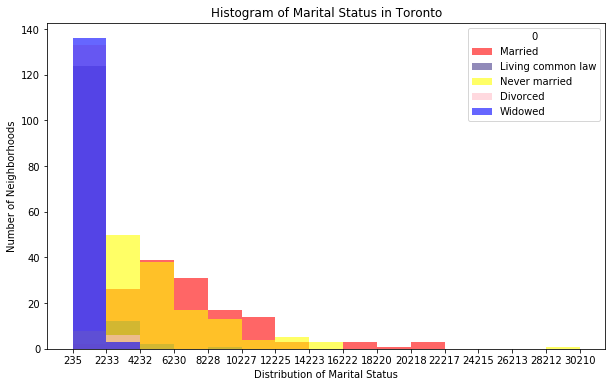

In [495]:
count, bin_edges = np.histogram(marital3, 15)

# un-stacked histogram
marital3.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['red', 'darkslateblue', 'yellow','pink','blue']
         )

plt.title('Histogram of Marital Status in Toronto')
plt.ylabel('Number of Neighborhoods')
plt.xlabel('Distribution of Marital Status')

plt.show()

In [567]:
#income.head(2)

income2= income.set_index('Neighborhood')

income2.head()

,"$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$150,000 and over","$100,000 and over","$30,000 to $39,999","$40,000 to $49,999","$50,000 to $59,999","$20,000 to $29,999","$80,000 and over"
Neighborhood,,,,,,,,,,,
Agincourt North,865,655,435,365,135,245,2465,1895,1265,3520,720
Agincourt South-Malvern West,825,570,435,315,165,265,2020,1560,1125,2715,710
Alderwood,690,530,395,370,225,325,1095,950,825,1360,830
Annex,1460,1290,1000,830,3055,3660,2150,1935,1655,2605,5200
Banbury-Don Mills,1425,1220,960,820,1635,2150,1980,1915,1665,2435,3675


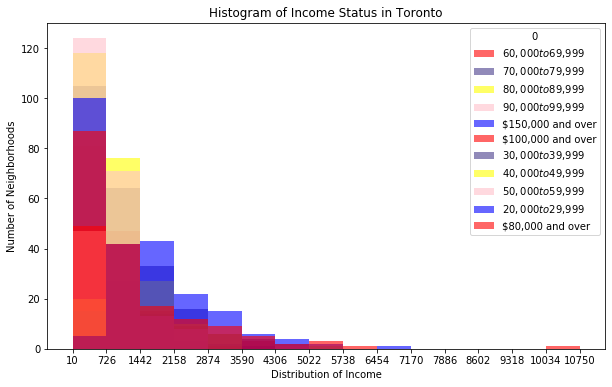

In [497]:
count, bin_edges = np.histogram(income2, 15)

# un-stacked histogram
income2.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['red', 'darkslateblue', 'yellow','pink','blue']
         )

plt.title('Histogram of Income Status in Toronto')
plt.ylabel('Number of Neighborhoods')
plt.xlabel('Distribution of Income')

plt.show()

In [568]:
education2= education.set_index('Neighborhood')

    
education2.head()

,Master's degree,"Postsecondary certificate, diploma or degree",Apprenticeship or trades certificate or diploma,"No certificate, diploma or degree",Secondary (high) school diploma or equivalency certificate,Trades certificate or diploma other than Certificate of Apprenticeship or Certificate of Qualification,Certificate of Apprenticeship or Certificate of Qualification,"College, CEGEP or other non-university certificate or diploma",University certificate or diploma below bachelor level,"University certificate, diploma or degree at bachelor level or above",Bachelor's degree,University certificate or diploma above bachelor level,"Degree in medicine, dentistry, veterinary medicine or optometry"
Neighborhood,,,,,,,,,,,,,
Agincourt North,890,10985,885,6550,7460,505,375,3540,775,5805,4380,295,125
Agincourt South-Malvern West,1020,10285,705,4035,6090,375,325,3150,655,5765,4210,280,150
Alderwood,430,5300,690,2005,2960,345,345,2095,230,2290,1660,125,35
Annex,4795,20430,530,1585,4270,265,265,2700,615,16590,9135,960,460
Banbury-Don Mills,2575,15950,805,2295,5150,450,345,3490,795,10850,6500,800,625


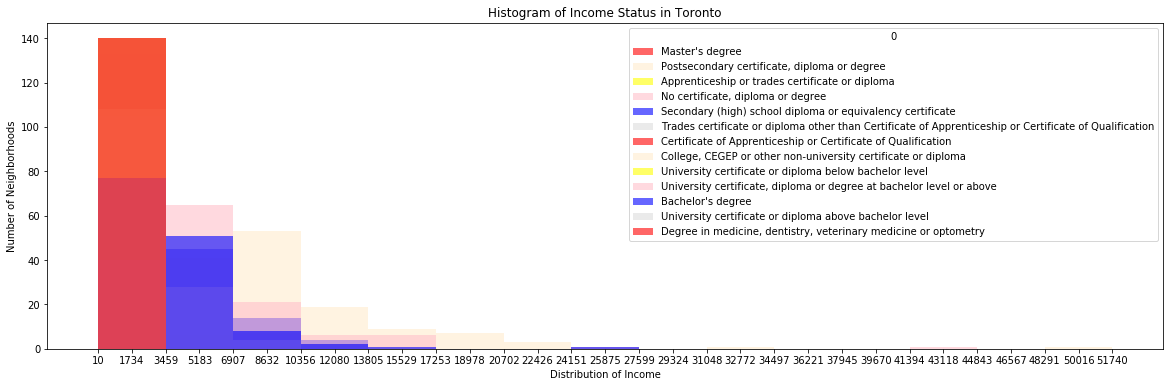

In [524]:
count, bin_edges = np.histogram(education2, 30)

# un-stacked histogram
education2.plot(kind ='hist', 
          figsize=(20, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['red', 'blanchedalmond', 'yellow','pink','blue','gainsboro']
         )

plt.title('Histogram of Income Status in Toronto')
plt.ylabel('Number of Neighborhoods')
plt.xlabel('Distribution of Income')

plt.show()

In [534]:
import folium
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge geopy --yes


Solving environment: done

# All requested packages already installed.



In [539]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


In [542]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [546]:
for lat, lng, borough, neighborhood in zip(
        df_merge['Latitude'], 
        df_merge['Longitude'], 
        df_merge['Borough'], 
        df_merge['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

map_toronto

In [557]:
world_map = folium.Map(location=[43.6534817, -79.3839347], zoom_start=12, tiles='Stamen Toner')

# display map
world_map